## 6. Regression

[Data Science Playlist on YouTube](https://www.youtube.com/watch?v=iOJbOfPHXLg&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy)
[![Python Data Science](https://apmonitor.com/che263/uploads/Begin_Python/DataScience06.png)](https://www.youtube.com/watch?v=iOJbOfPHXLg&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy "Python Data Science")

Regression is the process of adjusting model parameters to fit a prediction `y` to measured values `z`. There are independent variables `x` as inputs to the model to generate the predictions `y`. For machine learning, the objective is to minimize a loss function by adjusting model parameters. A common loss function is the sum of squared errors between the predicted `y` and measured `z` values.

    x = Independent Variable, Input, Feature
    y = Dependent Variable, Output, Label
    z = Output Measurement

![temperature](https://apmonitor.com/che263/uploads/Begin_Python/temperature.png)

The is objective is to minimize a loss function such as a sum of squared errors between the measured and predicted values:

$Loss = \sum_{i=1}^{n}\left(y_i-z_i\right)^2$

where `n` is the number of observations. Regression requires labelled data (output values) for training. Classification, on the other hand, can either be supervised (with `z` measurements, labels) or unsupervised (no labels, `z` measurements). Run the following code to load 30 sample data points with input `x` and measured output `z`. 

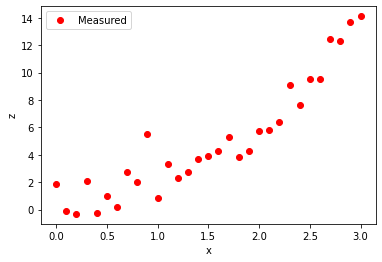

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
n = 31
x = np.linspace(0,3,n)
z = np.array([1.89,-0.12,-0.32,2.11,-0.25,1.01,0.17,2.75,2.01,5.5,\
     0.87,3.31,2.29,2.73,3.67,3.92,4.29,5.27,3.85,4.26,\
     5.75,5.82,6.36,9.13,7.61,9.52,9.53,12.49,12.29,13.7,14.12])
data = pd.DataFrame(np.vstack((x,z)).T,columns=['x','z'])
plt.plot(x,z,'ro',label='Measured')
plt.xlabel('x'); plt.ylabel('z'); plt.legend()
plt.show()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Linear Regression

There are many model forms such as linear, polynomial, and nonlinear. A familiar linear model is a line with slope `a` and intercept `b`.

    y = a x + b
    
A simple method for linear regression is with `numpy` to fit `p=np.polyfit(x,y,1)` and evaluate `np.polyval(p,x)` the model. Run the following code to determine the slope and intercept that minimize the sum of squared errors (least squares) between the predicted `y` and measured `z` output.

Slope, Intercept:[ 4.22197581 -1.31586694]


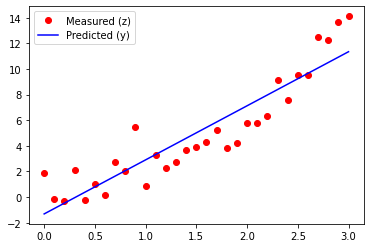

In [2]:
p1 = np.polyfit(x,z,1)

print('Slope, Intercept:' + str(p1))

plt.plot(x,z,'ro',label='Measured (z)')
plt.plot(x,np.polyval(p1,x),'b-',label='Predicted (y)')
plt.legend(); plt.show()

The $R^2$ value can be calculated with the measured (true) and model (predicted) values for any regression model, not just linear.

```python
from sklearn.metrics import r2_score
meas  = [3.0, 2.0, 1.9, 7.1]
model = [2.5, 1.8, 2.0, 8.0]
r2_score(meas, model)
```

Another package is `statsmodels` that performs standard Ordinary Least Squares (OLS) analysis with a nice report summary. The input `x` is augmented with a `np.ones(n)` column so that it also predicts the intercept

```python
xc = np.vstack((x,np.ones(n))).T
```

and this is also accomplished more conveniently with `xc=sm.add_constant(x)`.

In [3]:
import statsmodels.api as sm
xc = sm.add_constant(x)
model = sm.OLS(z,xc).fit()
predictions = model.predict(xc)
model.summary()

ModuleNotFoundError: No module named 'statsmodels'

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Linear Regression Activity

Create a linear model with the data:

```python
xr = [0.0,1.0,2.0,3.5,5.0]
yr = [0.7,0.55,0.34,0.3,0.2]
```

Calculate the $R^2$ value and show the data and linear fit on a plot.

Slope, Intercept:[-0.09664557  0.64028481]


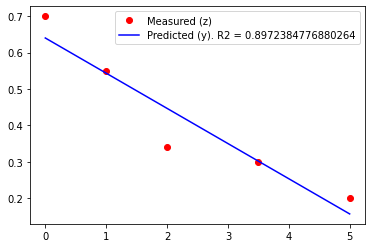

In [13]:
from sklearn.metrics import r2_score
xr = [0.0,1.0,2.0,3.5,5.0]
yr = [0.7,0.55,0.34,0.3,0.2]

p1 = np.polyfit(xr,yr,1)

print('Slope, Intercept:' + str(p1))
yr_hat = np.polyval(p1, xr)

plt.plot(xr,yr,'ro',label='Measured (z)')
plt.plot(xr,yr_hat,'b-',label='Predicted (y). R2 = {}'.format(r2_score(yr,yr_hat)))
plt.legend(); plt.show()

![debug](https://apmonitor.com/che263/uploads/Begin_Python/debug.png)

### Polynomial Regression

A polynomial model may also be quadratic:

    y = a x^2 + b x + c
    
A quadratic model is really just a linear model with two inputs `x` and `z=x^2`.

    y = a z + b x + c
    
This is also called multiple linear regression when there is more than one input `y=f(x,z)` where `f` is a function of inputs `x` and `z`.

[ 1.71448706 -0.92148536  1.1701393 ]


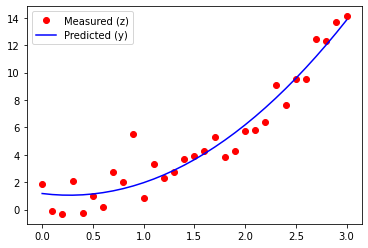

In [14]:
p2 = np.polyfit(x,z,2)
print(p2)
plt.plot(x,z,'ro',label='Measured (z)')
plt.plot(x,np.polyval(p2,x),'b-',label='Predicted (y)')
plt.legend(); plt.show()

There is more information on the regressed coefficients for the quadratic fit if you use `statsmodels`.

In [ ]:
import statsmodels.api as sm
xc = np.vstack((x**2,x,np.ones(n))).T
model = sm.OLS(z,xc).fit()
predictions = model.predict(xc)
model.summary()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Polynomial Regression Activity

Create a polynomial model with the data:

```python
xr = [0.0,1.0,2.0,3.5,5.0]
yr = [1.7,1.45,1.05,0.4,0.2]
```

Show the polynomial model on a plot.

[ 0.02015526 -0.42382116  1.76447671]


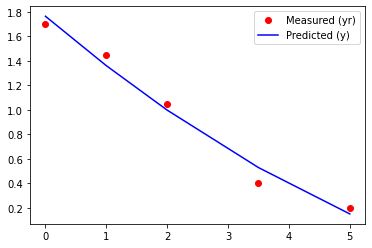

In [15]:
xr = [0.0,1.0,2.0,3.5,5.0]
yr = [1.7,1.45,1.05,0.4,0.2]
p2 = np.polyfit(xr,yr,2)
print(p2)
plt.plot(xr,yr,'ro',label='Measured (yr)')
plt.plot(xr,np.polyval(p2,xr),'b-',label='Predicted (y)')
plt.legend(); plt.show()

![list](https://apmonitor.com/che263/uploads/Begin_Python/list.png)

### Nonlinear Regression

Nonlinear regression requires a different tool such as `curve_fit` that requires a function `f` that returns a prediction. It also requires the data `x` and `z`. The unknown parameters `a` and `b` are adjusted so that the predicted output matches the measured output `z`.

p = [0.88676183 0.93776713]


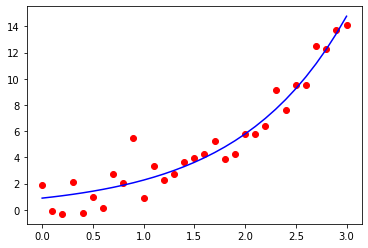

In [16]:
from scipy.optimize import curve_fit
def f(x,a,b):
    return a * np.exp(b*x)
p, pcov = curve_fit(f,x,z)
print('p = '+str(p))
plt.plot(x,z,'ro')
plt.plot(x,f(x,*p),'b-')
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Nonlinear Regression Activity

Create a nonlinear model with the data:

$y = a \ln\left( b \, x \right)$

```python
xr = [0.1,1.0,2.0,3.5,5.0]
yr = [0.2,0.4,1.05,1.45,1.7]
```

Show the nonlinear model on a plot.

p = [ 0.37568765 10.0217894 ]


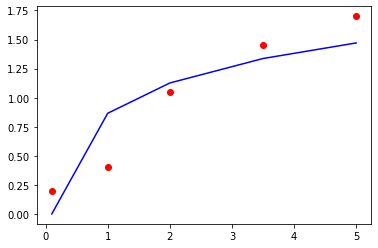

In [19]:
xr = np.array([0.1,1.0,2.0,3.5,5.0])
yr = np.array([0.2,0.4,1.05,1.45,1.7])
def f(x,a,b):
    return a * np.log(b*x)
p, pcov = curve_fit(f,xr,yr)
print('p = '+str(p))
plt.plot(xr,yr,'ro')
plt.plot(xr,f(xr,*p),'b-')
plt.show()

![exercise](https://apmonitor.com/che263/uploads/Begin_Python/exercise.png)

### Machine Learning

Machine learning is computer algorithms and statistical models that rely on patterns and inference. They perform a specific task without explicit instructions. Machine learned regression models can be as simple as linear regression or as complex as deep learning. This tutorial demonstrates several regression methods with `scikit-learn`.

#### Generate Data

To make the plot interactive, add the command: 

```python
%matplotlib notebook
```

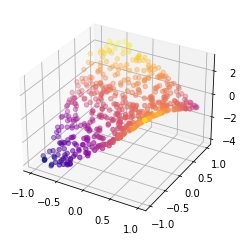

In [22]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import math
def f(x,y):
    return 2*math.cos(x)*y + x*math.cos(y) - 3*x*y

n = 500
x = (np.random.rand(n)-0.5)*2.0
y = (np.random.rand(n)-0.5)*2.0
z = np.empty_like(x)
for i in range(n):
    z[i] = f(x[i],y[i])
data = pd.DataFrame(np.vstack((x,y,z)).T,columns=['x','y','z'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=z,cmap='plasma')
plt.show()

#### Scale Data

The data can be scaled with a Standard Scalar or just left unscaled because the values of `x`, `y`, and `z` are already close to acceptable ranges. If scaling is desired, it could be done with a few lines of additional code and changes to the plots.

```python
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data)
ds = pd.DataFrame(ds,columns=data.columns)
```

The data is split into training and testing sets with `train_test_split`.

In [23]:
# no data scaling
ds = data

# data splitting into train and test sets
from sklearn.model_selection import train_test_split
train,test = train_test_split(ds, test_size=0.2, shuffle=True)

#### Function for Plotting

Run this code so that each of the regressor models will train and display on a 3D scatter and surface plot.

In [24]:
def fit(method):
    # create points for plotting surface
    xp = np.arange(-1, 1, 0.1)
    yp = np.arange(-1, 1, 0.1)
    XP, YP = np.meshgrid(xp, yp)

    model = method.fit(train[['x','y']],train['z'])
    zp = method.predict(np.vstack((XP.flatten(),YP.flatten())).T)
    ZP = zp.reshape(np.size(XP,0),np.size(XP,1))

    r2 = method.score(test[['x','y']],test['z'])
    print('R^2: ' + str(r2))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ds['x'],ds['y'],ds['z'],c=z,cmap='plasma',label='data')
    ax.plot_surface(XP, YP, ZP, cmap='coolwarm',alpha=0.7,
                    linewidth=0, antialiased=False)
    plt.show()
    return

#### Linear Regression with `sklearn`

The simplest regressor is a linear model. As expected, this model doesn't perform very well with the nonlinear data but it does predict the slope of the data.

R^2: 0.5266821940098523


C:\Users\curti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


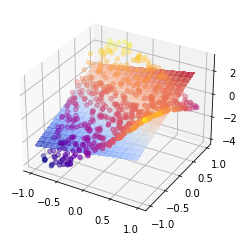

In [25]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
fit(lm)

#### K-Nearest Neighbors

R^2: 0.9937256950373592


C:\Users\curti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


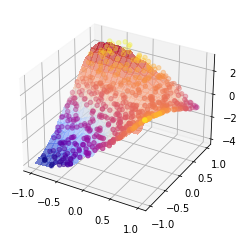

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
fit(knn)

#### Support Vector Regressor

R^2: 0.9933609824917524


C:\Users\curti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


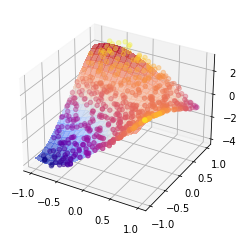

In [27]:
from sklearn import svm
s = svm.SVR(gamma='scale')
fit(s)

#### Multilayer Perceptron (Neural Network)

R^2: 0.997253445307958


C:\Users\curti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\curti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


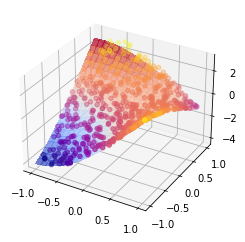

In [28]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(3), 
                  activation='tanh', solver='lbfgs')
fit(nn)

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Regressor Activity

Find another [regressor in scikit-learn](https://scikit-learn.org/stable/supervised_learning.html) such as *Decision Tree Regressor* or *Passive Agressive Regressor*. Train and test the regressor with the `fit()` function in this notebook by passing in the regressor object such as:

*Decision Tree Regressor*

```python
from sklearn import tree
dt = tree.DecisionTreeRegressor()
fit(dt)
```

*Passive Aggressive Regressor*

```python
from sklearn.linear_model import PassiveAggressiveRegressor
par = PassiveAggressiveRegressor(max_iter=2000,tol=1e-3)
fit(par)
```

Change the options of the regressor if you can improve the $R^2$ value such as the `PassiveAggressiveRegressor` with `max_iter=2000`.

R^2: 0.9875016444987299


C:\Users\curti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


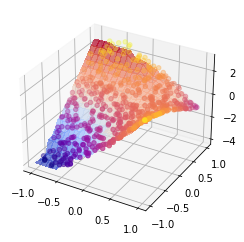

In [29]:
from sklearn import tree
dt = tree.DecisionTreeRegressor()
fit(dt)

![gekko](https://apmonitor.com/che263/uploads/Begin_Python/gekko.png)

### Deep Learning

Deep learning is regression with a neural network with multiple layers. Regression with deep learning has specialized packages such as [Tensorflow that are built for large-scale data](https://www.tensorflow.org) or [Gekko that are built for configurable model structures](https://gekko.readthedocs.io/en/latest/). Below is one of the examples from a [deep learning tutorial with Gekko](https://apmonitor.com/do/index.php/Main/DeepLearning).  This same example with Keras (Tensorflow) is also shown in the link.

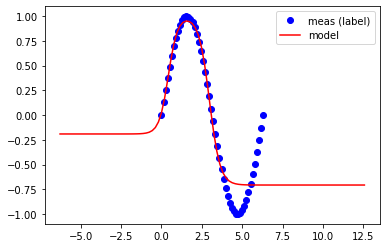

In [30]:
from gekko import brain
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0,2*np.pi)
y = np.sin(x)

b = brain.Brain(remote=False)
b.input_layer(1)
b.layer(linear=2)
b.layer(tanh=2)
b.layer(linear=2)
b.output_layer(1)
b.learn(x,y,disp=False)      

xp = np.linspace(-2*np.pi,4*np.pi,100)
yp = b.think(xp)  

plt.figure()
plt.plot(x,y,'bo',label='meas (label)')
plt.plot(xp,yp[0],'r-',label='model')
plt.legend(); plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### TCLab Activity

### Record Temperatures

![connections](https://apmonitor.com/che263/uploads/Begin_Python/connections.png)

Set heater 1 to 80% with `lab.Q1(80)` and heater 2 to 60% with `lab.Q1(60)`. Record the temperatures (`lab.T1` and `lab.T2`) every 0.5 seconds (use `time.sleep(0.5)`) for 30 seconds. Store the values for time, temperature 1, and temperature 2 in `numpy` arrays. Use __time.time()__ to get the current time in seconds.

# DANIEL- I don't have my TCLAB with me and I'm at home with a COVID exposure and I cant find data for this online. But I feel comfortable with this module, so I'm not going to worry about it.

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Linear Regression

Create a linear model for `T2` with regression. Report the $R^2$ value. Add the regression line as a black line to a plot with the measured `T2` as blue circles. Add appropriate labels to the plot.

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Nonlinear Regression

Create a nonlinear regression for `T1`. Fit the $T_1$ data with:

1. a nonlinear model of the form $T_1 = a + b \exp{(c \, t)}$ where `a`, `b`, and `c` are adjustable parameters.
2. a nonlinear model using a regressor in `scikit-learn`, `keras (tensorflow)`, or `gekko`

Report the $R^2$ value for each.